### Problem Statement

The dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#import packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle

In [6]:
#import dataset 
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Data description

1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3. Married - This refers to applicant being in a state of matrimony
4. Dependents - This refres to persons who depends on the applicants for survival
5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7. Applicant Income - This refers to disposable income available for the applicant's use under State law.
8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

In [7]:
#view top few rows
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
#check for null values, data type for each column, number of entries and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are null values present in few columns, data type is mixed as float, integer and object all type of data is present. Total no. of rows present are 614 and 13 columns. Target variables data type, Loan_Status=object.

In [9]:
#lets find out mean, min, max and std for each column
#transpose columns into rows by using T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


### Exploratory Data Analysis

In [10]:
#check value count for each column so that we get unique values with their number of occurances.
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [11]:
#dropping column Loan_ID as it seems of no use in the prediction
df.drop(columns=['Loan_ID'],inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


#### Univariate Analysis

In [13]:
# Spliting the columns into two categories for further analysis.
# 'Credit_History' has numeric value but we can treat it as cetegorical value as it has only 2 values.
numerical_col=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
categorical_col=['Gender', 'Married','Dependents','Education','Self_Employed','Property_Area', 'Credit_History', 'Loan_Status']

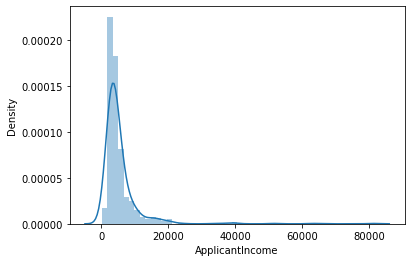

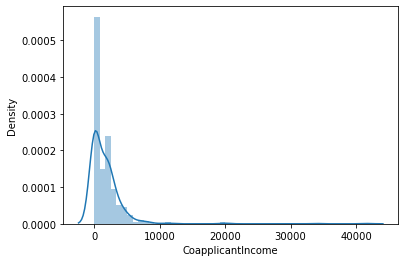

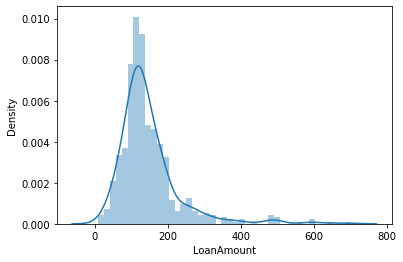

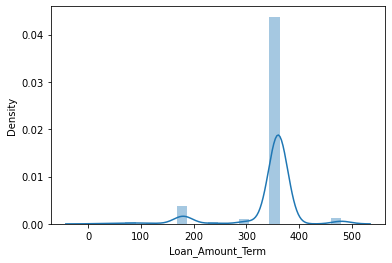

In [14]:
#Display distribution for all numerical columns.
for i in numerical_col:
    sns.distplot(df[i])
    plt.show()

'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are close to normal distribution with slight skewness.

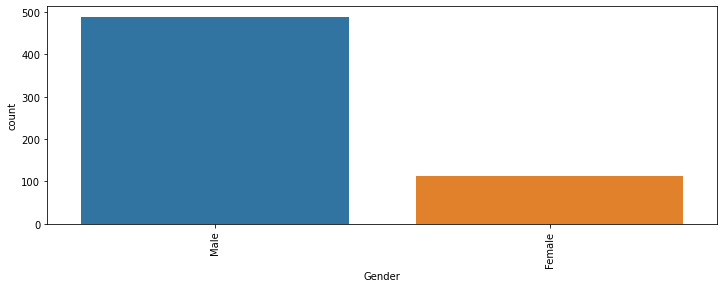

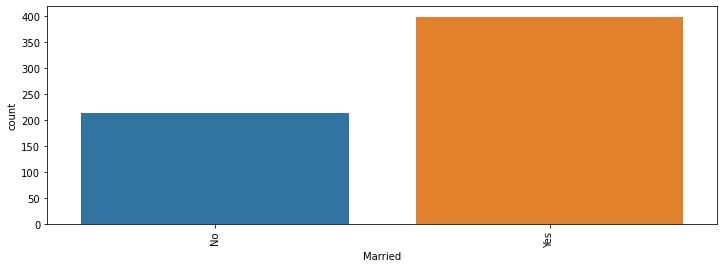

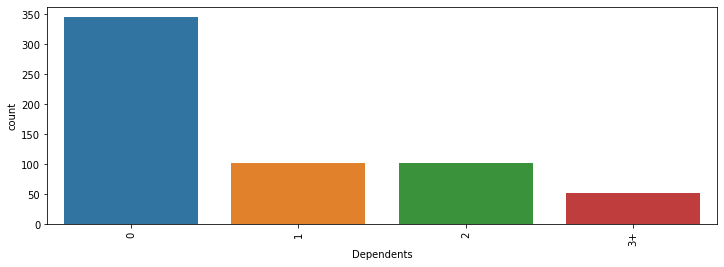

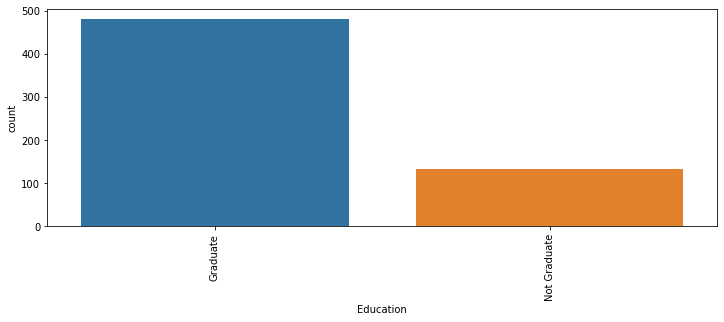

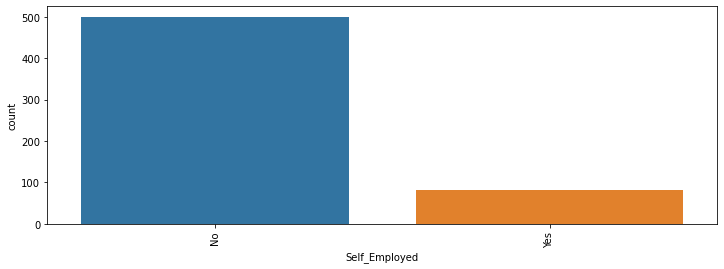

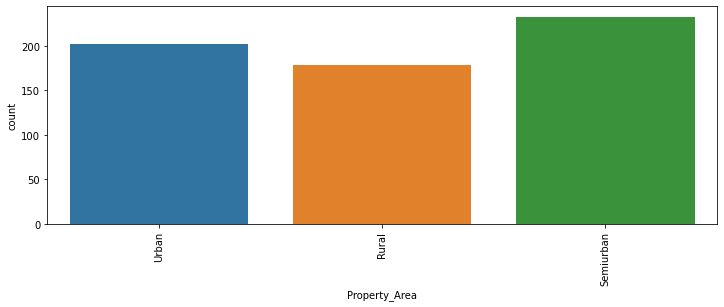

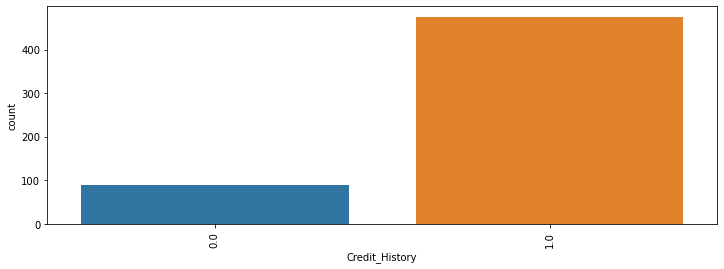

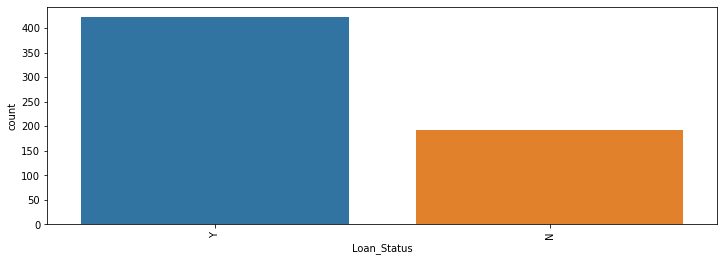

In [15]:
#Display value_counts of all categorical columns 
for i in categorical_col:
    plt.figure(figsize=(12,4))
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

Looks like the feature Loan_Status has different value counts. So for target variable Loan_Status would require any class balancing later on.

#### Handle missing data

In [16]:
# Fill the na values of abject type columns with mode
df['Gender']=df['Gender'].fillna(df['Gender'].value_counts().index[0])
df['Married']=df['Married'].fillna(df['Married'].value_counts().index[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].value_counts().index[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].value_counts().index[0])

In [17]:
# Fill the na values of numeric type columns with mean as they are closer to normally distributed
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [18]:
# Although Credit_History have numeric values but its values can be treated as category as well.
# Filling the na values with mode
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].value_counts().index[0])

In [19]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


#### Bivariate Analysis

Bivariate analysis when target variable is Loan_Status

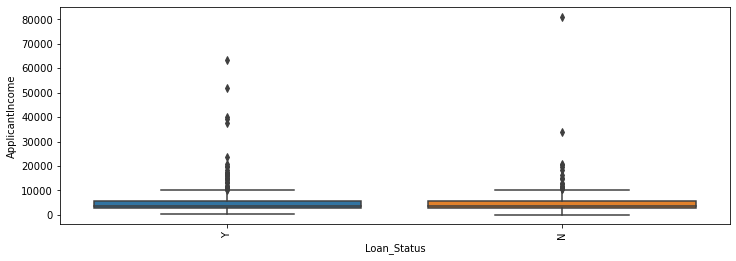

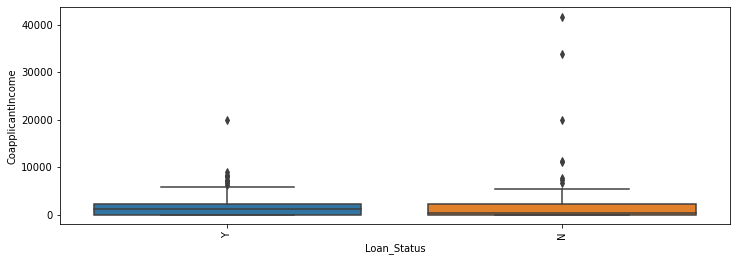

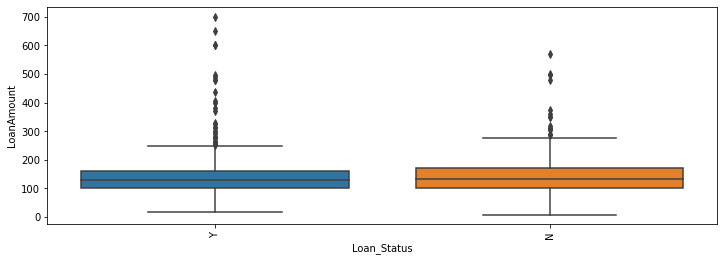

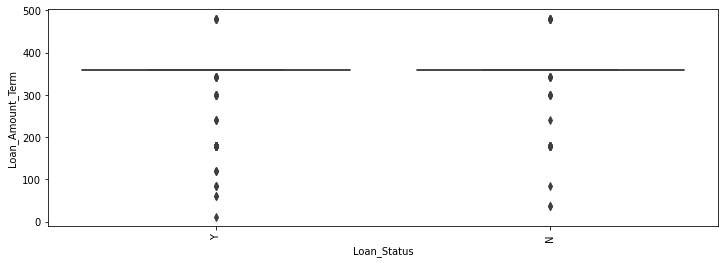

In [21]:
#For all numerical columns compare the value ranges for Loan_Status
for i in numerical_col:
    plt.figure(figsize=(12,4))
    sns.boxplot(x=df['Loan_Status'],y=df[i])
    plt.xticks(rotation=90)
    plt.show()

No visible difference in value ranges of numeric columns across Loan status.

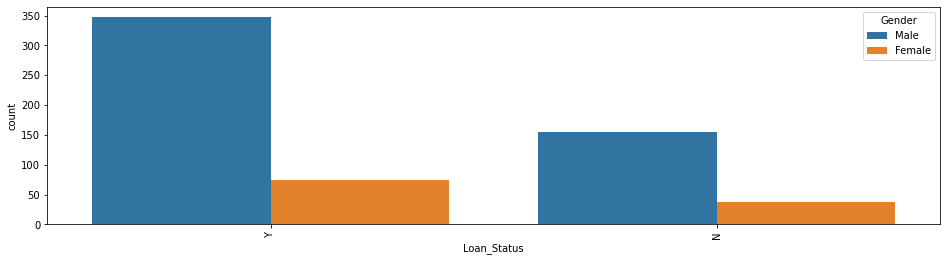

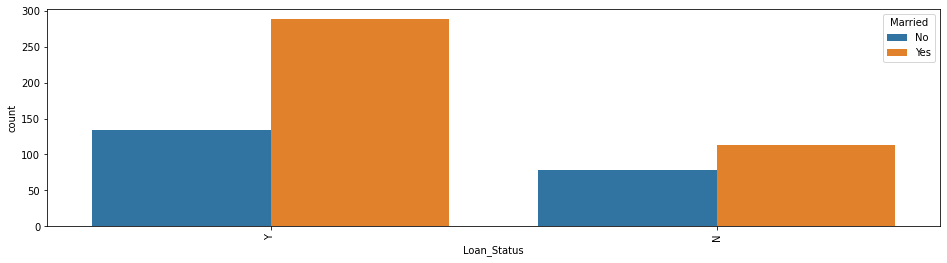

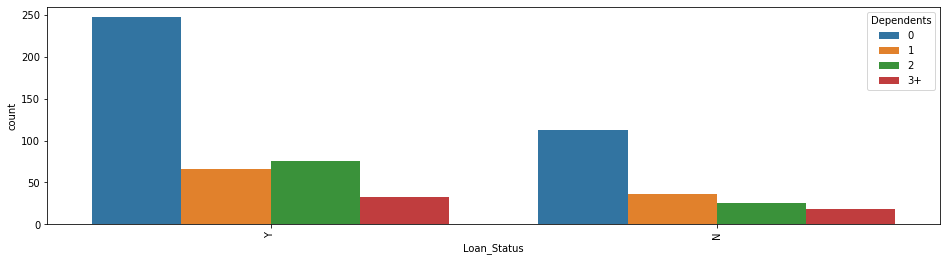

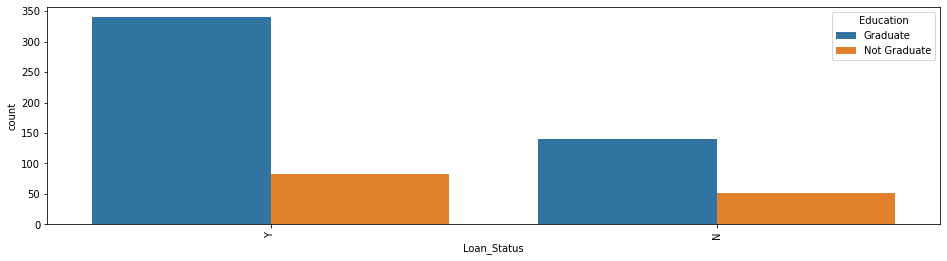

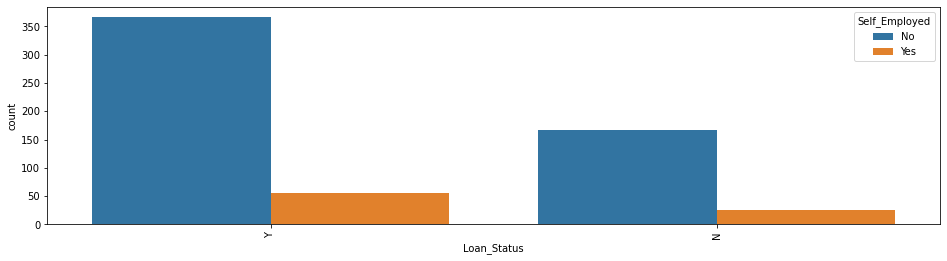

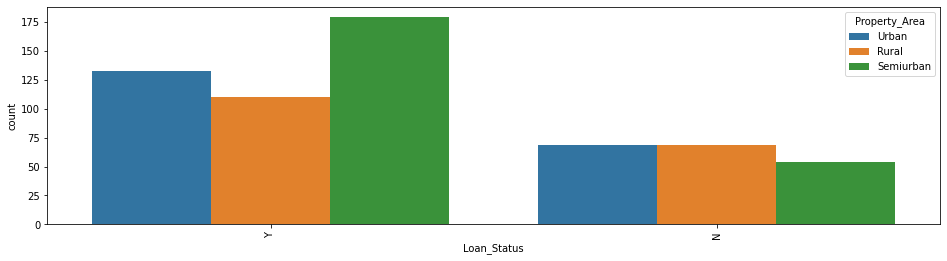

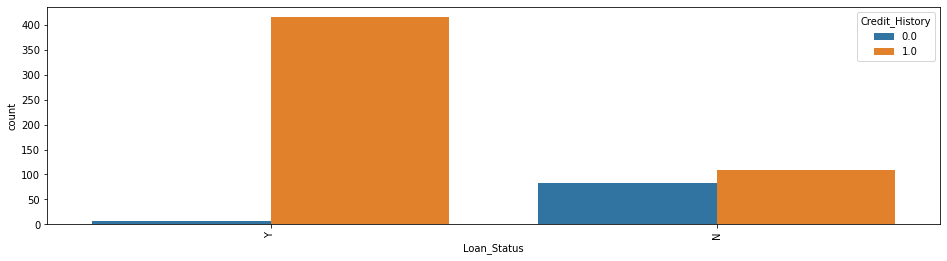

In [22]:
#type variable vs region variable, as there are only two variables in categorical list
for i in categorical_col[:-1]:
    plt.figure(figsize=(16,4))
    sns.countplot(hue=df[i],x=df['Loan_Status'])
    plt.xticks(rotation=90)
    plt.show()

Loans with credit history has higher chances of approval.

#### Multivariate Analysis

<AxesSubplot:>

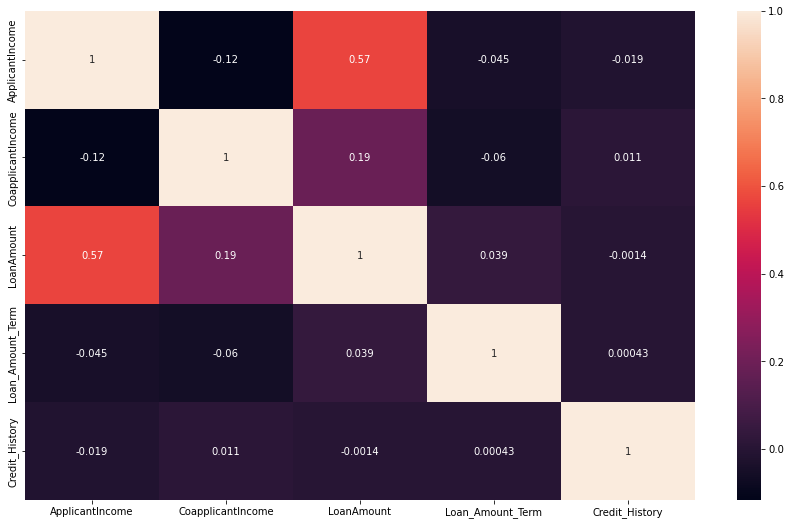

In [23]:
# Plot a heatmap using dataframe correlation values
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

No two features have high correlation with each other.

### Feature Engineering

In [24]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
#converting categorical features (apart from target variable) to numerical values
categorical_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History',
 'Loan_Status']

In [26]:
# map features with 2 categorical value to 0 and 1
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [27]:
# One-Hot-Encoding for Dependents column
dfDependents=pd.get_dummies(df['Dependents'], prefix='Dependents')
dfDependents

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
609,1,0,0,0
610,0,0,0,1
611,0,1,0,0
612,0,0,1,0


In [28]:
# One-Hot-Encoding for Property_Area column
dfProperty_Area=pd.get_dummies(df['Property_Area'], prefix='Property_Area')
dfProperty_Area

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [29]:
# Concat the above datafrmaes to the main dataframe
df=pd.concat([df,dfDependents],axis=1)
df=pd.concat([df,dfProperty_Area],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1,1,0,0,0,0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,0,1,0,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1,1,0,0,0,0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,1,0,0,0,0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Rural,1,1,0,0,0,1,0,0
610,1,1,3+,1,0,4106,0.0,40.000000,180.0,1.0,Rural,1,0,0,0,1,1,0,0
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Urban,1,0,1,0,0,0,0,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,Urban,1,0,0,1,0,0,0,1


In [30]:
df.drop(columns=['Dependents','Property_Area'],inplace=True)

In [31]:
df.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [32]:
# Create X with all independent variables
X=df[['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban']]
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,0,0,0,1,0,0
610,1,1,1,0,4106,0.0,40.000000,180.0,1.0,0,0,0,1,1,0,0
611,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1,0,0,0,0,1
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0,0,0,1,0,0,0,1


In [33]:
# Create y with only target variable
y=df['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [34]:
#check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
9,inf,Dependents_0
10,inf,Dependents_1
11,inf,Dependents_2
12,inf,Dependents_3+
13,inf,Property_Area_Rural
14,inf,Property_Area_Semiurban
15,inf,Property_Area_Urban
6,1.715219,LoanAmount
4,1.646890,ApplicantIncome
1,1.311986,Married


In [35]:
#Dropping column Dependents_0 as its vif value is very high
X.drop(columns=['Dependents_0'],inplace=True)

In [36]:
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
13,18.702593,Property_Area_Semiurban
14,15.709272,Property_Area_Urban
12,14.601062,Property_Area_Rural
6,1.715219,LoanAmount
4,1.646890,ApplicantIncome
1,1.311986,Married
10,1.196426,Dependents_2
0,1.188790,Gender
9,1.155779,Dependents_1
11,1.148759,Dependents_3+


In [37]:
#Dropping column Property_Area_Semiurban as its vif value is very high
X.drop(columns=['Property_Area_Semiurban'],inplace=True)

In [38]:
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
7,11.373744,Loan_Amount_Term
6,6.916619,LoanAmount
8,6.171658,Credit_History
0,6.121135,Gender
2,4.735590,Education
1,3.736688,Married
4,2.929090,ApplicantIncome
13,1.817590,Property_Area_Urban
12,1.767726,Property_Area_Rural
5,1.491334,CoapplicantIncome


In [39]:
#Dropping column Loan_Amount_Term as its vif value is very high
X.drop(columns=['Loan_Amount_Term'],inplace=True)

In [40]:
#again check VIF to reduce multicolliniarity
vif=pd.DataFrame()
vif["value"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['feature']=X.columns
vif.sort_values(by='value',ascending=False)

,value,feature
6,6.480335,LoanAmount
0,5.629979,Gender
7,4.891397,Credit_History
2,4.132284,Education
1,3.731082,Married
4,2.901392,ApplicantIncome
12,1.776926,Property_Area_Urban
11,1.700833,Property_Area_Rural
5,1.485022,CoapplicantIncome
9,1.429792,Dependents_2


We have removed all the columns which had multicollinearity.

In [41]:
#Feature scaling of X
ss=StandardScaler()

In [42]:
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Urban
0,1,0,1,0,5849,0.0,146.412162,1.0,0,0,0,0,1
1,1,1,1,0,4583,1508.0,128.000000,1.0,1,0,0,1,0
2,1,1,1,1,3000,0.0,66.000000,1.0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.000000,1.0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.000000,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,1.0,0,0,0,1,0
610,1,1,1,0,4106,0.0,40.000000,1.0,0,0,1,1,0
611,1,1,1,0,8072,240.0,253.000000,1.0,1,0,0,0,1
612,1,1,1,0,7583,0.0,187.000000,1.0,0,1,0,0,1


In [43]:
# Apply standard scaler on only relevant columns
X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]=ss.fit_transform(X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Urban
0,1,0,1,0,0.072991,-0.554487,0.000000,1.0,0,0,0,0,1
1,1,1,1,0,-0.134412,-0.038732,-0.219273,1.0,1,0,0,1,0
2,1,1,1,1,-0.393747,-0.554487,-0.957641,1.0,0,0,0,0,1
3,1,1,0,0,-0.462062,0.251980,-0.314547,1.0,0,0,0,0,1
4,1,0,1,0,0.097728,-0.554487,-0.064454,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,-0.410130,-0.554487,-0.898095,1.0,0,0,0,1,0
610,1,1,1,0,-0.212557,-0.554487,-1.267279,1.0,0,0,1,1,0
611,1,1,1,0,0.437174,-0.472404,1.269371,1.0,1,0,0,0,1
612,1,1,1,0,0.357064,-0.554487,0.483367,1.0,0,1,0,0,1


In [44]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

target feature values seems to be unbalanced, so we need to do oversampling

### Model Building

In [45]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=80)

In [46]:
X_train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Urban
412,1,1,0,0,0.113456,-0.554487,0.852551,0.0,0,0,0,1,0
395,1,1,1,0,-0.348532,-0.388953,-0.135909,1.0,0,1,0,0,0
71,1,1,0,1,-0.578051,0.086787,-0.588457,1.0,0,1,0,0,0
275,1,1,1,0,-0.434704,0.075501,-0.374092,1.0,1,0,0,0,0
228,1,1,1,0,-0.105743,-0.554487,0.138001,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,1,1,1,1,0.002218,0.880600,1.436099,1.0,0,1,0,0,1
238,0,0,1,0,-0.260721,-0.554487,-0.409820,1.0,1,0,0,1,0
443,1,0,1,0,5.294102,-0.554487,0.066546,1.0,1,0,0,0,0
266,1,1,1,0,-0.113934,-0.080115,0.042728,1.0,0,1,0,0,0


In [47]:
X_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Urban
332,1,0,1,0,-0.421106,-0.554487,-0.898095,1.0,0,0,0,0,1
153,1,1,0,0,-0.511538,-0.554487,-0.397911,1.0,0,1,0,1,0
118,1,1,1,0,0.026956,0.178105,0.340457,1.0,0,0,0,1,0
451,1,1,0,0,-0.564453,-0.056516,-1.029096,1.0,0,1,0,0,1
84,1,1,1,0,-0.231888,-0.554487,-1.148187,1.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,1,0,1,0,-0.479100,-0.554487,-1.041005,1.0,0,0,0,0,1
115,1,1,1,0,1.503841,-0.554487,0.459549,1.0,1,0,0,1,0
573,1,1,0,0,0.118207,0.001284,0.483367,1.0,0,1,0,0,0
550,1,1,1,1,0.201430,-0.554487,0.000000,0.0,0,1,0,1,0


In [48]:
y_train

412    0
395    1
71     1
275    1
228    1
      ..
5      1
238    1
443    1
266    1
380    1
Name: Loan_Status, Length: 460, dtype: int64

In [49]:
y_test

332    1
153    0
118    0
451    1
84     1
      ..
208    1
115    1
573    0
550    0
296    1
Name: Loan_Status, Length: 154, dtype: int64

In [50]:
y_train.value_counts()

1    316
0    144
Name: Loan_Status, dtype: int64

#### Class balancing of train data

In [51]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [52]:
X_train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Urban
0,1,1,0,0,0.113456,-0.554487,0.852551,0.000000,0,0,0,1,0
1,1,1,1,0,-0.348532,-0.388953,-0.135909,1.000000,0,1,0,0,0
2,1,1,0,1,-0.578051,0.086787,-0.588457,1.000000,0,1,0,0,0
3,1,1,1,0,-0.434704,0.075501,-0.374092,1.000000,1,0,0,0,0
4,1,1,1,0,-0.105743,-0.554487,0.138001,1.000000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,1,1,1,0,-0.296340,0.619231,-0.232875,0.000000,0,0,0,1,0
628,0,0,1,0,-0.119266,0.136280,0.015546,1.000000,0,0,0,1,0
629,1,0,1,0,2.391676,0.271175,4.464113,1.000000,0,0,0,1,0
630,0,0,1,0,1.078230,0.377574,1.834244,1.000000,0,0,0,1,0


In [53]:
y_train

0      0
1      1
2      1
3      1
4      1
      ..
627    0
628    0
629    0
630    0
631    0
Name: Loan_Status, Length: 632, dtype: int64

#### Logistic Regression

In [54]:
# Fit the Logistic Regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [55]:
#Predict on train data
y_train_pred=lr.predict(X_train)
y_train_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,

In [56]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.7183544303797469

In [57]:
#Predict on test data
y_test_pred=lr.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [58]:
# Print the confusion matrix which has the TruePositive, FalsePositive, FalseNegative and TrueNegative counts 
confusion_matrix(y_test,y_test_pred)

array([[28, 20],
       [23, 83]], dtype=int64)

In [59]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.7207792207792207

#### Random Forest

In [60]:
# Fit the Random Forest Classifier model
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [62]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

1.0

In [63]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [64]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[27, 21],
       [19, 87]], dtype=int64)

In [65]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.7402597402597403

The Logistic regression and random forest classifier has similar accuracy score in test data.
But in Random forest model as we can see the train accuracy score is 100% but the test accuracy score is significantly lower, this means model is overfitting.

Let's do hyperparameter tuning to handle overfitting

#### Hyperparameter tuning

In [66]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [67]:
param_grid = {
    #'bootstrap': [True],
    #'max_depth': [20, 25, 30],
    'max_depth': [20],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    #'max_features': [0.3, 0.4, 0.5],
    'max_features': ["auto", "sqrt", "log2"],
    #'max_features': ["auto"],
    'n_estimators': [50, 100, 150, 200]
    #'n_estimators': [150]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)

In [68]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 1/5; 1/108] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.772 total time=   0.0s
[CV 2/5; 1/108] START max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 2/5; 1/108] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.748 total time=   0.0s
[CV 3/5; 1/108] START max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 3/5; 1/108] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=0.794 total time=   0.0s
[CV 4/5; 1/108] START max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=50
[CV 4/5; 1/108] END max_depth=20, max_features=auto, min_sam

[CV 3/5; 7/108] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.802 total time=   0.1s
[CV 4/5; 7/108] START max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 4/5; 7/108] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.857 total time=   0.1s
[CV 5/5; 7/108] START max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 5/5; 7/108] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.770 total time=   0.1s
[CV 1/5; 8/108] START max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 1/5; 8/108] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=0.772 total time=   0.2s
[CV 2/5; 8/108] START max_depth=20, max_features=auto, min_samples_leaf=1, min_sample

[CV 2/5; 14/108] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.748 total time=   0.0s
[CV 3/5; 14/108] START max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 3/5; 14/108] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.762 total time=   0.0s
[CV 4/5; 14/108] START max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 4/5; 14/108] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.841 total time=   0.0s
[CV 5/5; 14/108] START max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 5/5; 14/108] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.794 total time=   0.0s
[CV 1/5; 15/108] START max_depth=20, max_features=auto, min_samples_leaf=2, mi

[CV 4/5; 20/108] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.825 total time=   0.2s
[CV 5/5; 20/108] START max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200
[CV 5/5; 20/108] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.810 total time=   0.2s
[CV 1/5; 21/108] START max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 1/5; 21/108] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.764 total time=   0.0s
[CV 2/5; 21/108] START max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 2/5; 21/108] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.748 total time=   0.0s
[CV 3/5; 21/108] START max_depth=20, max_features=auto, min_samples_leaf=2, min_sa

[CV 1/5; 27/108] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=150;, score=0.740 total time=   0.1s
[CV 2/5; 27/108] START max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=150
[CV 2/5; 27/108] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=150;, score=0.764 total time=   0.1s
[CV 3/5; 27/108] START max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=150
[CV 3/5; 27/108] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=150;, score=0.778 total time=   0.1s
[CV 4/5; 27/108] START max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=150
[CV 4/5; 27/108] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=150;, score=0.817 total time=   0.1s
[CV 5/5; 27/108] START max_depth=20, max_features=auto, min_samples_leaf=3, mi

[CV 3/5; 33/108] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.754 total time=   0.0s
[CV 4/5; 33/108] START max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50
[CV 4/5; 33/108] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.817 total time=   0.0s
[CV 5/5; 33/108] START max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50
[CV 5/5; 33/108] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.786 total time=   0.0s
[CV 1/5; 34/108] START max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100
[CV 1/5; 34/108] END max_depth=20, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=100;, score=0.787 total time=   0.0s
[CV 2/5; 34/108] START max_depth=20, max_features=auto, min_samples_leaf=3, min_sam

[CV 5/5; 39/108] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=150;, score=0.794 total time=   0.0s
[CV 1/5; 40/108] START max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200
[CV 1/5; 40/108] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.748 total time=   0.1s
[CV 2/5; 40/108] START max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200
[CV 2/5; 40/108] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.764 total time=   0.1s
[CV 3/5; 40/108] START max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200
[CV 3/5; 40/108] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.817 total time=   0.1s
[CV 4/5; 40/108] START max_depth=20, max_features=sqrt, min_samples_leaf=1, mi

[CV 3/5; 46/108] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.786 total time=   0.1s
[CV 4/5; 46/108] START max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 46/108] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.833 total time=   0.0s
[CV 5/5; 46/108] START max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/5; 46/108] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.810 total time=   0.0s
[CV 1/5; 47/108] START max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 1/5; 47/108] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.756 total time=   0.1s
[CV 2/5; 47/108] START max_depth=20, max_features=sqrt, min_samples_leaf=1, mi

[CV 5/5; 52/108] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.786 total time=   0.2s
[CV 1/5; 53/108] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50
[CV 1/5; 53/108] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.756 total time=   0.0s
[CV 2/5; 53/108] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50
[CV 2/5; 53/108] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.764 total time=   0.0s
[CV 3/5; 53/108] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50
[CV 3/5; 53/108] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.810 total time=   0.0s
[CV 4/5; 53/108] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samp

[CV 2/5; 59/108] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.756 total time=   0.0s
[CV 3/5; 59/108] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 3/5; 59/108] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.786 total time=   0.1s
[CV 4/5; 59/108] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 4/5; 59/108] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.817 total time=   0.1s
[CV 5/5; 59/108] START max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 5/5; 59/108] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.794 total time=   0.1s
[CV 1/5; 60/108] START max_depth=20, max_features=sqrt, min_samples_leaf=2, mi

[CV 5/5; 65/108] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=0.810 total time=   0.0s
[CV 1/5; 66/108] START max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100
[CV 1/5; 66/108] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.780 total time=   0.0s
[CV 2/5; 66/108] START max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100
[CV 2/5; 66/108] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.748 total time=   0.0s
[CV 3/5; 66/108] START max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100
[CV 3/5; 66/108] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.746 total time=   0.0s
[CV 4/5; 66/108] START max_depth=20, max_features=sqrt, min_samples_leaf=3, min

[CV 2/5; 72/108] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.740 total time=   0.1s
[CV 3/5; 72/108] START max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 3/5; 72/108] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.770 total time=   0.1s
[CV 4/5; 72/108] START max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 4/5; 72/108] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.802 total time=   0.1s
[CV 5/5; 72/108] START max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200
[CV 5/5; 72/108] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=200;, score=0.786 total time=   0.1s
[CV 1/5; 73/108] START max_depth=20, max_features=log2, min_samples_leaf=1, mi

[CV 4/5; 78/108] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.833 total time=   0.0s
[CV 5/5; 78/108] START max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 5/5; 78/108] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=0.794 total time=   0.0s
[CV 1/5; 79/108] START max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 1/5; 79/108] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.795 total time=   0.1s
[CV 2/5; 79/108] START max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 2/5; 79/108] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=0.756 total time=   0.1s
[CV 3/5; 79/108] START max_depth=20, max_features=log2, min_samples_leaf=1, mi

[CV 4/5; 85/108] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.825 total time=   0.0s
[CV 5/5; 85/108] START max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50
[CV 5/5; 85/108] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50;, score=0.817 total time=   0.0s
[CV 1/5; 86/108] START max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 1/5; 86/108] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.756 total time=   0.0s
[CV 2/5; 86/108] START max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100
[CV 2/5; 86/108] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.764 total time=   0.0s
[CV 3/5; 86/108] START max_depth=20, max_features=log2, min_samples_leaf=2, min_s

[CV 1/5; 92/108] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.748 total time=   0.1s
[CV 2/5; 92/108] START max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200
[CV 2/5; 92/108] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.772 total time=   0.1s
[CV 3/5; 92/108] START max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200
[CV 3/5; 92/108] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.786 total time=   0.1s
[CV 4/5; 92/108] START max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200
[CV 4/5; 92/108] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=0.817 total time=   0.1s
[CV 5/5; 92/108] START max_depth=20, max_features=log2, min_samples_leaf=2, mi

[CV 4/5; 98/108] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.825 total time=   0.0s
[CV 5/5; 98/108] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100
[CV 5/5; 98/108] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.786 total time=   0.0s
[CV 1/5; 99/108] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=150
[CV 1/5; 99/108] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=150;, score=0.772 total time=   0.0s
[CV 2/5; 99/108] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=150
[CV 2/5; 99/108] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=150;, score=0.756 total time=   0.0s
[CV 3/5; 99/108] START max_depth=20, max_features=log2, min_samples_leaf=3, mi

[CV 1/5; 105/108] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50
[CV 1/5; 105/108] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.740 total time=   0.0s
[CV 2/5; 105/108] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50
[CV 2/5; 105/108] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.780 total time=   0.0s
[CV 3/5; 105/108] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50
[CV 3/5; 105/108] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.786 total time=   0.0s
[CV 4/5; 105/108] START max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=50
[CV 4/5; 105/108] END max_depth=20, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=10)

In [69]:
best_params=grid_search.best_params_
print(best_params)

{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [70]:
#Fit the random forest classifier model
rf=RandomForestClassifier(**best_params)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=4, n_estimators=200)

In [71]:
#Predict on train data
y_train_pred=rf.predict(X_train)
y_train_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [72]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.995253164556962

In [73]:
# Predict on test data
y_test_pred=rf.predict(X_test)
y_test_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [74]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[26, 22],
       [18, 88]], dtype=int64)

In [75]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.7402597402597403

After hyperparameter tuning there isn't much change in the train and test accuracy.

#### XGBoost Model

In [76]:
xgr_cls=xgb.XGBClassifier()
xgr_cls.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [77]:
#Predict on train data
y_train_pred=xgr_cls.predict(X_train)
y_train_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [78]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

1.0

In [79]:
# Predict on test data
y_test_pred=xgr_cls.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [80]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[28, 20],
       [18, 88]], dtype=int64)

In [81]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.7532467532467533

Let's do hyperparameter tuning to handle overfitting

#### Hyperparameter tuning

In [82]:
xgr_cls.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [83]:
parameters = {"learning_rate": [0.3],
               "n_estimators": [200],
               #"gamma" : [0, 1, 2],
               #"reg_lambda": [0, 1.5, 2.0, 2.5],
               #"reg_alpha": [0, 1.5, 2.0, 2.5],
               "min_child_weight": range(1,4),
               "max_depth": range(2,6,1),
               "subsample":[0.8,0.9,1.0],
               "colsample_bytree":[0.8,0.9,1.0]
             }
# Create a based model
xgr_cls=xgb.XGBClassifier()
# Instantiate the random search model as the combination of hyperparameter can be very high
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = 1, verbose = 10)
rdm_search = RandomizedSearchCV(xgr_cls, param_distributions = parameters, scoring = "accuracy",verbose=10,return_train_score=True,n_jobs=1,random_state=10,cv = 5,n_iter=200)

In [84]:
rdm_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8
[CV 1/5; 1/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8;, score=(train=0.954, test=0.756) total time=   0.0s
[CV 2/5; 1/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8
[CV 2/5; 1/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8;, score=(train=0.947, test=0.732) total time=   0.0s
[CV 3/5; 1/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8
[CV 3/5; 1/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8;, score=(train=0.955, test=0.746) total time=   0.0s
[CV 4/5; 1/108] 

[CV 4/5; 6/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=0.921, test=0.786) total time=   0.0s
[CV 5/5; 6/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 5/5; 6/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=0.941, test=0.714) total time=   0.0s
[CV 1/5; 7/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=3, n_estimators=200, subsample=0.8
[CV 1/5; 7/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=3, n_estimators=200, subsample=0.8;, score=(train=0.937, test=0.717) total time=   0.0s
[CV 2/5; 7/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_child_weight=3, n_estimators=200, subsample=0.8
[CV 2/5; 7/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=2, min_c

[CV 3/5; 12/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=1.000, test=0.778) total time=   0.0s
[CV 4/5; 12/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 4/5; 12/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=0.996, test=0.802) total time=   0.0s
[CV 5/5; 12/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 5/5; 12/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=1.000, test=0.722) total time=   0.0s
[CV 1/5; 13/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=200, subsample=0.8
[CV 1/5; 13/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3

[CV 5/5; 17/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9;, score=(train=0.990, test=0.714) total time=   0.0s
[CV 1/5; 18/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 1/5; 18/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=0.974, test=0.724) total time=   0.0s
[CV 2/5; 18/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 2/5; 18/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=0.980, test=0.756) total time=   0.0s
[CV 3/5; 18/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 3/5; 18/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=3

[CV 2/5; 23/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9;, score=(train=1.000, test=0.748) total time=   0.0s
[CV 3/5; 23/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9
[CV 3/5; 23/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9;, score=(train=1.000, test=0.770) total time=   0.0s
[CV 4/5; 23/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9
[CV 4/5; 23/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9;, score=(train=0.998, test=0.841) total time=   0.0s
[CV 5/5; 23/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9
[CV 5/5; 23/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=4

[CV 4/5; 28/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8
[CV 4/5; 28/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 5/5; 28/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8
[CV 5/5; 28/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8;, score=(train=1.000, test=0.738) total time=   0.0s
[CV 1/5; 29/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9
[CV 1/5; 29/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9;, score=(train=1.000, test=0.717) total time=   0.0s
[CV 2/5; 29/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth

[CV 2/5; 34/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=(train=0.996, test=0.740) total time=   0.0s
[CV 3/5; 34/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8
[CV 3/5; 34/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=(train=1.000, test=0.794) total time=   0.0s
[CV 4/5; 34/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8
[CV 4/5; 34/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=(train=0.998, test=0.817) total time=   0.0s
[CV 5/5; 34/108] START colsample_bytree=0.8, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8
[CV 5/5; 34/108] END colsample_bytree=0.8, learning_rate=0.3, max_depth=5

[CV 5/5; 39/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=0.953, test=0.722) total time=   0.0s
[CV 1/5; 40/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=0.8
[CV 1/5; 40/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=0.8;, score=(train=0.945, test=0.740) total time=   0.0s
[CV 2/5; 40/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=0.8
[CV 2/5; 40/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=0.8;, score=(train=0.939, test=0.756) total time=   0.0s
[CV 3/5; 40/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=0.8
[CV 3/5; 40/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=2

[CV 3/5; 45/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 3/5; 45/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=0.929, test=0.770) total time=   0.0s
[CV 4/5; 45/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 4/5; 45/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=0.901, test=0.794) total time=   0.0s
[CV 5/5; 45/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 5/5; 45/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=2, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=0.923, test=0.698) total time=   0.0s
[CV 1/5; 46/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth

[CV 1/5; 51/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=0.994, test=0.724) total time=   0.0s
[CV 2/5; 51/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 2/5; 51/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=0.986, test=0.717) total time=   0.0s
[CV 3/5; 51/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 3/5; 51/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=0.996, test=0.762) total time=   0.0s
[CV 4/5; 51/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=3, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 4/5; 51/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=3

[CV 4/5; 56/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.9
[CV 4/5; 56/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.9;, score=(train=1.000, test=0.833) total time=   0.0s
[CV 5/5; 56/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.9
[CV 5/5; 56/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.9;, score=(train=1.000, test=0.722) total time=   0.0s
[CV 1/5; 57/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 1/5; 57/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=1.000, test=0.693) total time=   0.0s
[CV 2/5; 57/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth

[CV 2/5; 62/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.9
[CV 2/5; 62/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.9;, score=(train=0.996, test=0.732) total time=   0.0s
[CV 3/5; 62/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.9
[CV 3/5; 62/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.9;, score=(train=1.000, test=0.778) total time=   0.0s
[CV 4/5; 62/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.9
[CV 4/5; 62/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=4, min_child_weight=3, n_estimators=200, subsample=0.9;, score=(train=0.998, test=0.810) total time=   0.0s
[CV 5/5; 62/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth

[CV 4/5; 67/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8;, score=(train=0.998, test=0.825) total time=   0.0s
[CV 5/5; 67/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8
[CV 5/5; 67/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.8;, score=(train=1.000, test=0.754) total time=   0.0s
[CV 1/5; 68/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.9
[CV 1/5; 68/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.9;, score=(train=0.998, test=0.709) total time=   0.0s
[CV 2/5; 68/108] START colsample_bytree=0.9, learning_rate=0.3, max_depth=5, min_child_weight=2, n_estimators=200, subsample=0.9
[CV 2/5; 68/108] END colsample_bytree=0.9, learning_rate=0.3, max_depth=5

[CV 1/5; 73/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8
[CV 1/5; 73/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8;, score=(train=0.958, test=0.724) total time=   0.0s
[CV 2/5; 73/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8
[CV 2/5; 73/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8;, score=(train=0.956, test=0.748) total time=   0.0s
[CV 3/5; 73/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8
[CV 3/5; 73/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=1, n_estimators=200, subsample=0.8;, score=(train=0.962, test=0.770) total time=   0.0s
[CV 4/5; 73/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth

[CV 3/5; 78/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 3/5; 78/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=0.943, test=0.754) total time=   0.0s
[CV 4/5; 78/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 4/5; 78/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=0.929, test=0.770) total time=   0.0s
[CV 5/5; 78/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 5/5; 78/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=2, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=0.935, test=0.706) total time=   0.0s
[CV 1/5; 79/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth

[CV 1/5; 84/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 1/5; 84/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=1.000, test=0.740) total time=   0.0s
[CV 2/5; 84/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 2/5; 84/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=0.998, test=0.748) total time=   0.0s
[CV 3/5; 84/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0
[CV 3/5; 84/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0;, score=(train=1.000, test=0.738) total time=   0.0s
[CV 4/5; 84/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth

[CV 5/5; 89/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.9;, score=(train=0.992, test=0.730) total time=   0.0s
[CV 1/5; 90/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 1/5; 90/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=0.990, test=0.701) total time=   0.0s
[CV 2/5; 90/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 2/5; 90/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0;, score=(train=0.982, test=0.740) total time=   0.0s
[CV 3/5; 90/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0
[CV 3/5; 90/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=3

[CV 4/5; 95/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9
[CV 4/5; 95/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9;, score=(train=1.000, test=0.841) total time=   0.0s
[CV 5/5; 95/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9
[CV 5/5; 95/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=0.9;, score=(train=1.000, test=0.698) total time=   0.0s
[CV 1/5; 96/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0
[CV 1/5; 96/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=4, min_child_weight=2, n_estimators=200, subsample=1.0;, score=(train=1.000, test=0.709) total time=   0.0s
[CV 2/5; 96/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth

[CV 1/5; 101/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9;, score=(train=1.000, test=0.724) total time=   0.0s
[CV 2/5; 101/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9
[CV 2/5; 101/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9;, score=(train=1.000, test=0.772) total time=   0.0s
[CV 3/5; 101/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9
[CV 3/5; 101/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9;, score=(train=1.000, test=0.754) total time=   0.0s
[CV 4/5; 101/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9
[CV 4/5; 101/108] END colsample_bytree=1.0, learning_rate=0.3, max_

[CV 5/5; 106/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8
[CV 5/5; 106/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8;, score=(train=0.996, test=0.714) total time=   0.0s
[CV 1/5; 107/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9
[CV 1/5; 107/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9;, score=(train=0.998, test=0.693) total time=   0.0s
[CV 2/5; 107/108] START colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9
[CV 2/5; 107/108] END colsample_bytree=1.0, learning_rate=0.3, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.9;, score=(train=0.998, test=0.732) total time=   0.0s
[CV 3/5; 107/108] START colsample_bytree=1.0, learning_rate=0.3, ma

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                     

In [85]:
best_params=rdm_search.best_params_
print(best_params)

{'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.9}


In [86]:
#Fit the XGBoost classifier model
xgr_cls=xgb.XGBClassifier(**best_params)
xgr_cls.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [87]:
#Predict on train data
y_train_pred=xgr_cls.predict(X_train)
y_train_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [88]:
# Print the accuracy on train data
accuracy_score(y_train,y_train_pred)

0.9984177215189873

In [89]:
# Predict on test data
y_test_pred=xgr_cls.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [90]:
# Print the confusion matrix on test data
confusion_matrix(y_test,y_test_pred)

array([[28, 20],
       [24, 82]], dtype=int64)

In [91]:
# Print the accuracy on test data
accuracy_score(y_test,y_test_pred)

0.7142857142857143

Even after hyperparameter tuning there isn't much change in the test accuracy.

##### The random forest and XGBoost model are overfiiting it would be safer to use Logistic Regression model. Even though the Logistic Regression model accuracy on test data is slightly lower, the accuracies in train and test data are closer.

In [92]:
# Saving the best model
pickle.dump(lr, open('model_loan_application_classification.pkl', 'wb'))